In [1]:
#Final_Project_11613968
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# For timeseries RNN LSTM neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [3]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

### Load Dataset

In [4]:
df_ALL=pd.read_csv('DATA/GOOG_20140101_20190630.csv')

In [5]:
df_ALL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,555.647278,556.788025,552.060730,554.481689,554.481689,3656454
1,2014-01-03,555.418152,556.379578,550.401978,550.436829,550.436829,3345894
2,2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864
3,2014-01-07,560.399475,567.717041,558.486633,567.303589,567.303589,5124336
4,2014-01-08,570.860291,571.517822,564.528992,568.484192,568.484192,4501811


In [6]:
df_ALL.shape

(1382, 7)

In [7]:
df_ALL.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
# Statistics Sumary
df_ALL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1.382000e+03
mean,819.195519,826.032276,811.798320,819.147829,819.147829,1.884475e+06
std,228.689687,231.087414,226.686725,229.045157,229.045157,1.095459e+06
min,493.295654,494.618011,486.225067,491.201416,491.201416,7.922000e+03
25%,586.407532,589.281662,581.008683,585.380326,585.380326,1.262075e+06
50%,773.615021,778.630005,768.470001,772.355011,772.355011,1.571100e+06
75%,1042.342529,1054.703491,1028.487488,1040.077484,1040.077484,2.102393e+06
max,1274.000000,1289.270020,1266.295044,1287.579956,1287.579956,1.117433e+07


### Keep Only "Close" (for Closing Price) and Filter out all other attributes
notes: the research focuses only on the closing price

In [9]:
df = df_ALL.iloc[:,4:5]

In [10]:
df.head()

,Close
0,554.481689
1,550.436829
2,556.573853
3,567.303589
4,568.484192


<AxesSubplot:>

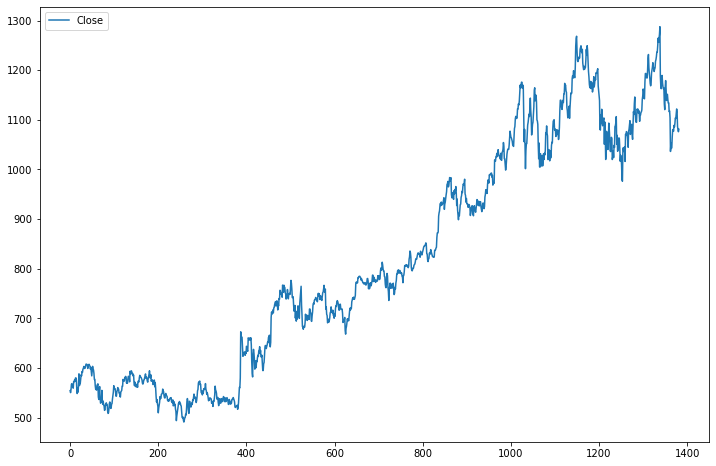

In [11]:
df.plot(figsize=(12, 8))

In [12]:
# I am giving Length60=50 as 50 but keeping name as length60
length60 = 50

In [13]:
length60

50

In [14]:
len(df)

1382

In [15]:
test_precent = 0.3

In [16]:
len(df)*test_precent

414.59999999999997

In [17]:
test_length = np.round(len(df)*test_precent)
test_length

415.0

In [18]:
split_index = int(len(df) - test_length)
split_index

967

In [19]:
data_train = df.iloc[: split_index]
data_test = df.iloc[split_index - length60 :]

In [20]:
data_train.head(5)

,Close
0,554.481689
1,550.436829
2,556.573853
3,567.303589
4,568.484192


In [21]:
data_train.tail()

,Close
962,972.559998
963,1019.270020
964,1017.109985
965,1016.640015
966,1025.500000


In [22]:
data_test.head(5)

,Close
917,927.000000
918,921.280029
919,915.890015
920,913.809998
921,921.289978


In [23]:
data_test.tail()

,Close
1377,1115.520020
1378,1086.349976
1379,1079.800049
1380,1076.010010
1381,1080.910034


In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(data_train)

MinMaxScaler()

In [26]:
normalized_train = scaler.transform(data_train)
normalized_test = scaler.transform(data_test)

In [27]:
batch_size30 = 30
train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size30)

In [28]:
len(normalized_train)

967

In [29]:
len(train_tsGenerator60)

31

In [30]:
x,y = train_tsGenerator60[0]

In [31]:
# print(x)

In [32]:
# print(y)

In [33]:
n_features = 1

In [34]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length60, n_features)))
model.add(Dropout(0.3))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [35]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
____________________________________________________

Train (Fit) Model Using fit_generator()

In [36]:
model.fit_generator(train_tsGenerator60, epochs=80)

Epoch 1/80
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   OMP_NUM_THREADS=8

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_IN

31/31 [==============================] - 17s 543ms/step - loss: 0.0831
Epoch 2/80
31/31 [==============================] - 10s 322ms/step - loss: 0.0185
Epoch 3/80
31/31 [==============================] - 10s 318ms/step - loss: 0.0113
Epoch 4/80
31/31 [==============================] - 10s 317ms/step - loss: 0.0054
Epoch 5/80
31/31 [==============================] - 10s 319ms/step - loss: 0.0063
Epoch 6/80
31/31 [==============================] - 10s 322ms/step - loss: 0.0060
Epoch 7/80
31/31 [==============================] - 10s 318ms/step - loss: 0.0071
Epoch 8/80
31/31 [==============================] - 10s 317ms/step - loss: 0.0037
Epoch 9/80
31/31 [==============================] - 10s 319ms/step - loss: 0.0034
Epoch 10/80
31/31 [==============================] - 10s 317ms/step - loss: 0.0041
Epoch 11/80
31/31 [==============================] - 10s 315ms/step - loss: 0.0036
Epoch 12/80
31/31 [==============================] - 10s 316ms/step - loss: 0.0085
Epoch 13/80
31/31 [=====

### Visualize Model's Performance after Training

In [37]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<AxesSubplot:>

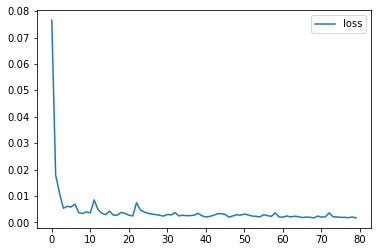

In [38]:
df_model_loss = pd.DataFrame(model.history.history)
df_model_loss.plot()

### Prediciton for Testing: Using TimeseriesGenerator
#### Create TimeseriesGenerator for Testing

In [39]:
batch_size1 = 1
test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size=batch_size1)

### predict Future Data Points for Testing

In [40]:
normalized_prediction = model.predict_generator (test_tsGenerator60) 

In [41]:
normalized_prediction

array([[0.85004556],
       [0.85860085],
       [0.86753345],
       [0.87564385],
       [0.88297284],
       [0.88983154],
       [0.8954276 ],
       [0.8993981 ],
       [0.9018049 ],
       [0.90301263],
       [0.90307605],
       [0.9030746 ],
       [0.9025104 ],
       [0.9014102 ],
       [0.901003  ],
       [0.90168357],
       [0.90360725],
       [0.90738547],
       [0.91196406],
       [0.914765  ],
       [0.9155702 ],
       [0.9140444 ],
       [0.91004854],
       [0.90479976],
       [0.90004665],
       [0.89719343],
       [0.89693093],
       [0.89905155],
       [0.9026811 ],
       [0.90696084],
       [0.9118602 ],
       [0.9179706 ],
       [0.92563283],
       [0.93369794],
       [0.9408714 ],
       [0.9465414 ],
       [0.950488  ],
       [0.9527278 ],
       [0.95315033],
       [0.95212835],
       [0.95010436],
       [0.9487644 ],
       [0.94967675],
       [0.9530643 ],
       [0.9591821 ],
       [0.9673803 ],
       [0.9764512 ],
       [0.985

In [42]:
len(normalized_prediction)

415

In [43]:
# convert normalized predictions back to the true values
prediction = scaler.inverse_transform(normalized_prediction)

In [45]:
prediction_index = np.arange(1244, 1659, step=1)

df_prediction = pd.DataFrame(data=prediction, index=prediction_index, columns=['Prediction'])

In [46]:
df_prediction

,Prediction
1244,945.379578
1245,949.950623
1246,954.723328
1247,959.056702
1248,962.972595
...,...
1654,1030.436279
1655,1033.779663
1656,1035.716675
1657,1035.945801


### Visualize Prediction

<AxesSubplot:>

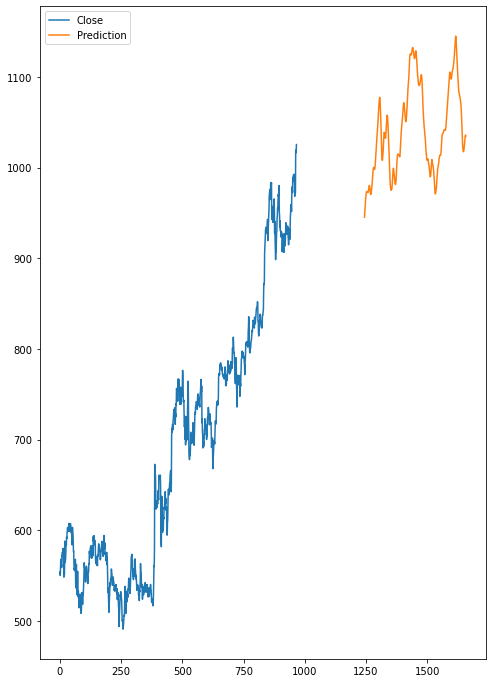

In [47]:
ax = data_train.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

<AxesSubplot:>

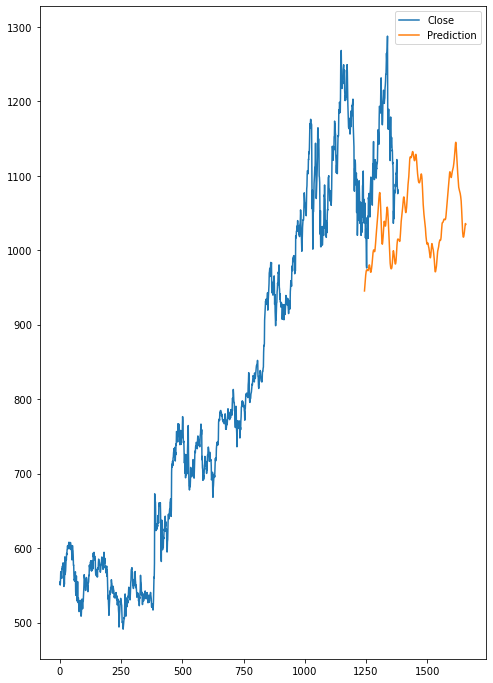

In [48]:
ax = df.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

In [49]:
#Still use Minmax Scaler to normalize the full input dataset

full_scaler = MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

In [50]:
# Number of time steps of the input time series
# still use length60:
length60

50

In [54]:
# create timeseries Generator for forecasting
forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length60, batch_size=batch_size30)


In [55]:
# Train/Fit LSTM model
# In forecasting, we don't validate, only FORECAST
# So, not need EarlyStop: Not need validation_generator

model.fit_generator(forecast_tsGenerator, epochs = 30)

Epoch 1/30
45/45 [==============================] - 15s 332ms/step - loss: 0.0018
Epoch 2/30
45/45 [==============================] - 15s 332ms/step - loss: 0.0022
Epoch 3/30
45/45 [==============================] - 15s 331ms/step - loss: 0.0016
Epoch 4/30
45/45 [==============================] - 15s 327ms/step - loss: 0.0018
Epoch 5/30
45/45 [==============================] - 15s 325ms/step - loss: 0.0018
Epoch 6/30
45/45 [==============================] - 15s 327ms/step - loss: 0.0019
Epoch 7/30
45/45 [==============================] - 15s 327ms/step - loss: 0.0017
Epoch 8/30
45/45 [==============================] - 15s 324ms/step - loss: 0.0023
Epoch 9/30
45/45 [==============================] - 15s 327ms/step - loss: 0.0014
Epoch 10/30
45/45 [==============================] - 15s 326ms/step - loss: 0.0015
Epoch 11/30
45/45 [==============================] - 15s 323ms/step - loss: 0.0018
Epoch 12/30
45/45 [==============================] - 15s 328ms/step - loss: 0.0017
Epoch 13/30
4

In [56]:
forecast = []
# Set periods with the time span of forecasting
# Let's forecast for the next 117 business days (07/01/2019 - 12/15/2019)
periods = 117

first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1, length60, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)
    


In [57]:
forecast = full_scaler.inverse_transform(forecast)

forecast

array([[1072.80132298],
       [1068.76570046],
       [1064.88966488],
       [1061.27451267],
       [1057.95370865],
       [1054.92217377],
       [1052.15308869],
       [1049.61441261],
       [1047.27790213],
       [1045.12746567],
       [1043.13823006],
       [1041.2780121 ],
       [1039.52008737],
       [1037.84314282],
       [1036.22838115],
       [1034.66047027],
       [1033.12986913],
       [1031.63016956],
       [1030.15548555],
       [1028.70026337],
       [1027.26455048],
       [1025.84782473],
       [1024.44918423],
       [1023.06725242],
       [1021.70426029],
       [1020.36239136],
       [1019.03993678],
       [1017.73642188],
       [1016.45403017],
       [1015.19361609],
       [1013.95741061],
       [1012.74717005],
       [1011.55791029],
       [1010.39243192],
       [1009.24878877],
       [1008.12607894],
       [1007.02453979],
       [1005.94436116],
       [1004.88502093],
       [1003.8456172 ],
       [1002.82610251],
       [1001.824

In [58]:
df

,Close
0,554.481689
1,550.436829
2,556.573853
3,567.303589
4,568.484192
...,...
1377,1115.520020
1378,1086.349976
1379,1079.800049
1380,1076.010010


In [59]:
#calculate forecast index

forecast_index = np.arange(1382,1499,step=1)

In [60]:
forecast_df=pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

In [61]:
forecast_df

,Forecast
1382,1072.801323
1383,1068.765700
1384,1064.889665
1385,1061.274513
1386,1057.953709
...,...
1494,958.793871
1495,958.424571
1496,958.059306
1497,957.697838


<AxesSubplot:>

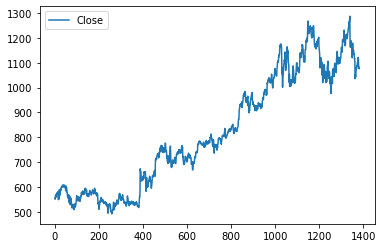

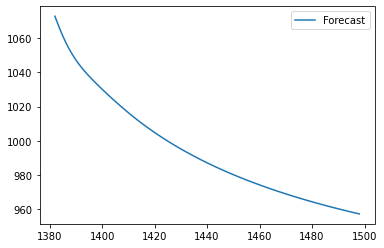

In [62]:
df.plot()
forecast_df.plot()

<AxesSubplot:>

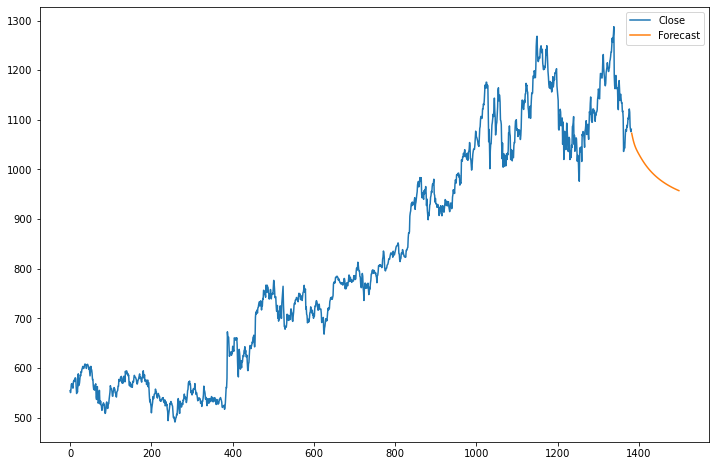

In [63]:
ax=df.plot()
forecast_df.plot(ax=ax, figsize=(12,8))

In [64]:
df_ALL_JUL_DEC_2019 = pd.read_csv('DATA/GOOG_20190701_20191215.csv')

In [65]:
df_ALL_JUL_DEC_2019.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-01,1098.000000,1107.579956,1093.703003,1097.949951,1097.949951,1436300
1,2019-07-02,1102.239990,1111.770020,1098.170044,1111.250000,1111.250000,991600
2,2019-07-03,1117.410034,1126.760010,1113.859985,1121.579956,1121.579956,767000
3,2019-07-05,1117.800049,1132.880005,1116.140015,1131.589966,1131.589966,1264300
4,2019-07-08,1125.170044,1125.979980,1111.209961,1116.349976,1116.349976,1236400


In [66]:
df_JUL_DEC_2019=df_ALL_JUL_DEC_2019.iloc[:,4:5]

In [67]:
df_JUL_DEC_2019

,Close
0,1097.949951
1,1111.250000
2,1121.579956
3,1131.589966
4,1116.349976
...,...
112,1343.560059
113,1344.660034
114,1345.020020
115,1350.270020


<AxesSubplot:>

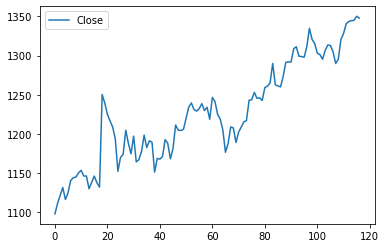

In [68]:
df_JUL_DEC_2019.plot()

In [69]:
forecast_df['Forecast'].values

array([1072.80132298, 1068.76570046, 1064.88966488, 1061.27451267,
       1057.95370865, 1054.92217377, 1052.15308869, 1049.61441261,
       1047.27790213, 1045.12746567, 1043.13823006, 1041.2780121 ,
       1039.52008737, 1037.84314282, 1036.22838115, 1034.66047027,
       1033.12986913, 1031.63016956, 1030.15548555, 1028.70026337,
       1027.26455048, 1025.84782473, 1024.44918423, 1023.06725242,
       1021.70426029, 1020.36239136, 1019.03993678, 1017.73642188,
       1016.45403017, 1015.19361609, 1013.95741061, 1012.74717005,
       1011.55791029, 1010.39243192, 1009.24878877, 1008.12607894,
       1007.02453979, 1005.94436116, 1004.88502093, 1003.8456172 ,
       1002.82610251, 1001.8246256 , 1000.84042699,  999.87379149,
        998.92376974,  997.98964972,  997.07228586,  996.17196296,
        995.28697218,  994.4167439 ,  993.56066104,  992.71896095,
        991.89112147,  991.0767154 ,  990.27550539,  989.4871117 ,
        988.7111546 ,  987.9474442 ,  987.19560076,  986.45529

In [70]:
df_JUL_DEC_2019['Forecast'] = forecast_df['Forecast'].values

In [71]:
df_JUL_DEC_2019

,Close,Forecast
0,1097.949951,1072.801323
1,1111.250000,1068.765700
2,1121.579956,1064.889665
3,1131.589966,1061.274513
4,1116.349976,1057.953709
...,...,...
112,1343.560059,958.793871
113,1344.660034,958.424571
114,1345.020020,958.059306
115,1350.270020,957.697838


<AxesSubplot:>

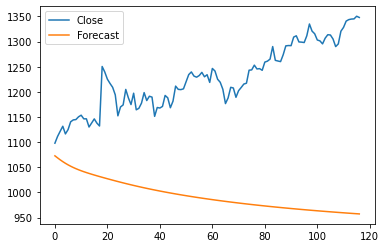

In [72]:
df_JUL_DEC_2019.plot()